In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('/content/gdrive/MyDrive/fraudTrain.csv')
test_data=pd.read_csv('/content/gdrive/MyDrive/fraudTest.csv')

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


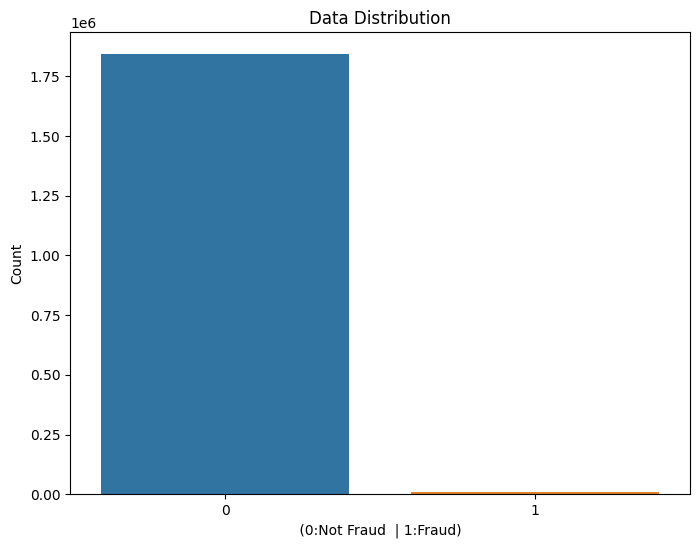

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=pd.concat([train_data, test_data], ignore_index=True))
plt.title('Data Distribution')
plt.xlabel(' (0:Not Fraud  | 1:Fraud) ')
plt.ylabel('Count')
plt.show()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

#Amount VS Fraud


In [ ]:
train_data['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [ ]:
np.percentile(train_data['amt'],99)

545.9926000000002

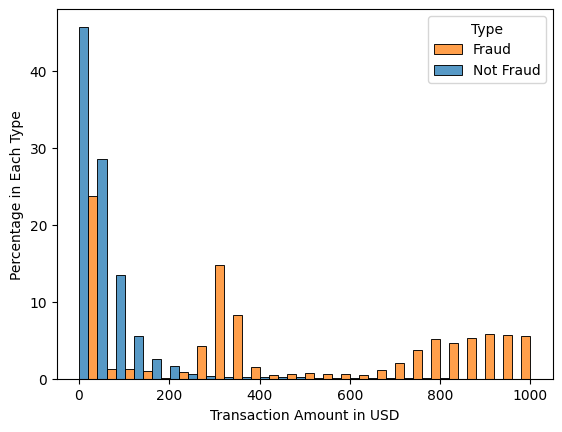

In [ ]:
#amount vs fraud
ax=sns.histplot(x='amt',data=train_data[train_data.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The result is very interesting! While normal transactions tend to be around \\$200 or less, we see fraudulent transactions peak around \\$300 and then at the \$800-\\$1000 range. There is a very clear pattern here!

#Gender vs Fraud

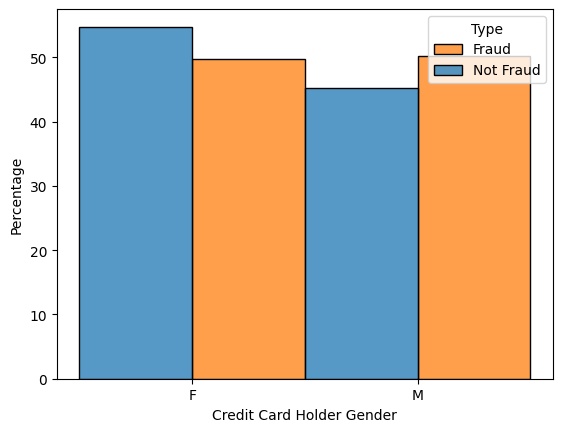

In [ ]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=train_data, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Gender is not very indicative of a fraudulent transaction.

# Spending Category vs Fraud

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

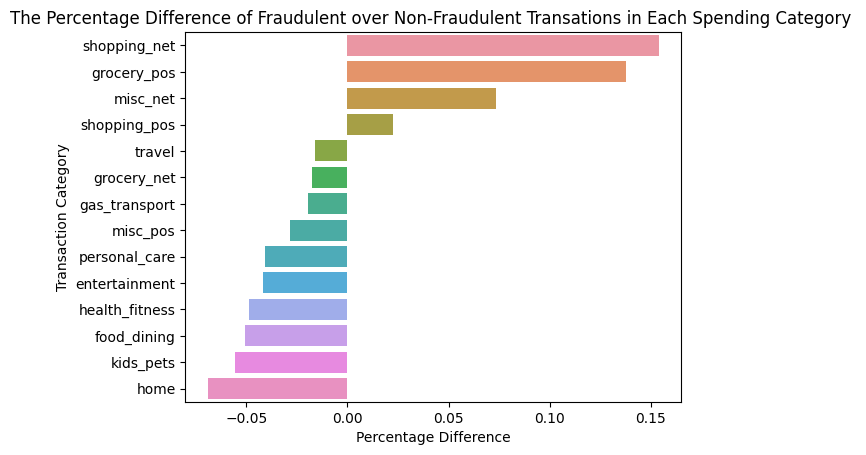

In [ ]:
#calculate the percentage difference
a=train_data[train_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_data[train_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

#Age vs Fraud

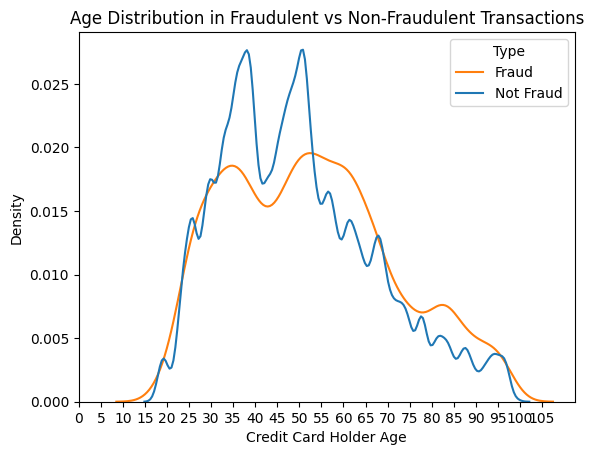

In [ ]:
#age vs fraud
import datetime as dt
train_data['age']=dt.date.today().year-pd.to_datetime(train_data['dob']).dt.year
ax=sns.kdeplot(x='age',data=train_data, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

#Cyclicality of Credit Card Fraud

Hourly Trend

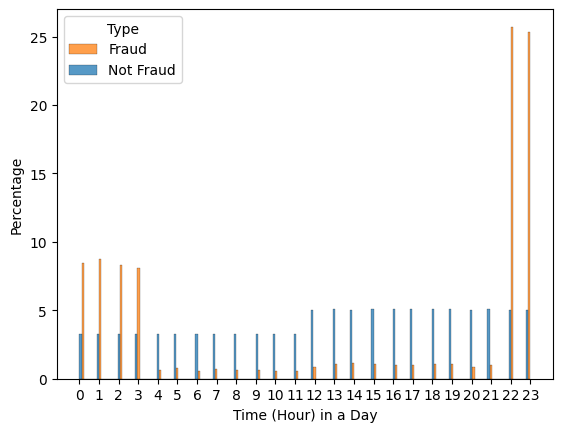

In [ ]:
#time in a day vs fraud
train_data['hour']=pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=train_data, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

A very sharp contrast! While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep!

Weekly Trend

<ipython-input-18-38b9193d883f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


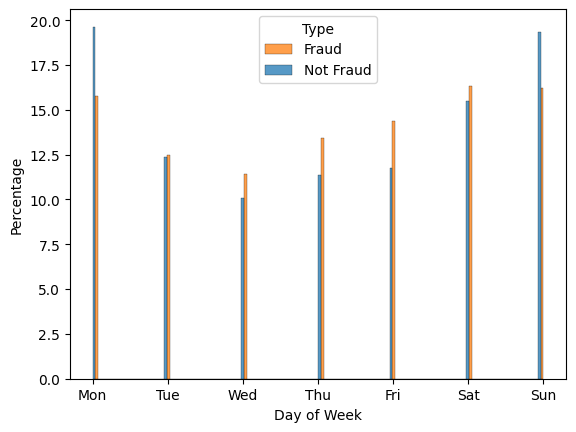

In [ ]:
#day of week vs fraud
train_data['day']=pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=train_data, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.

Monthly Trend

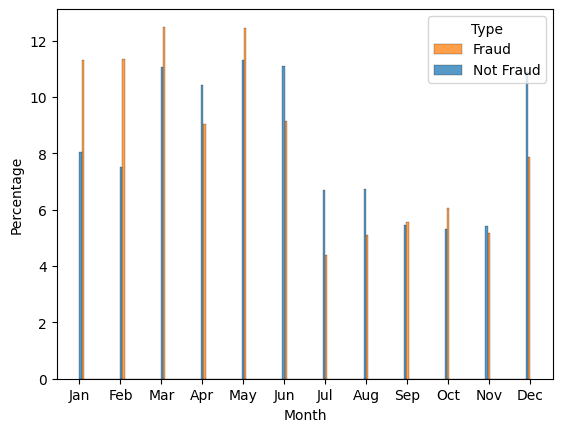

In [ ]:
train_data['month']=pd.to_datetime(train_data['trans_date_trans_time']).dt.month
ax=sns.histplot(data=train_data, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

fraudulent transactions are more concentrated in Jan-May

 # State/Location vs Fraud

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

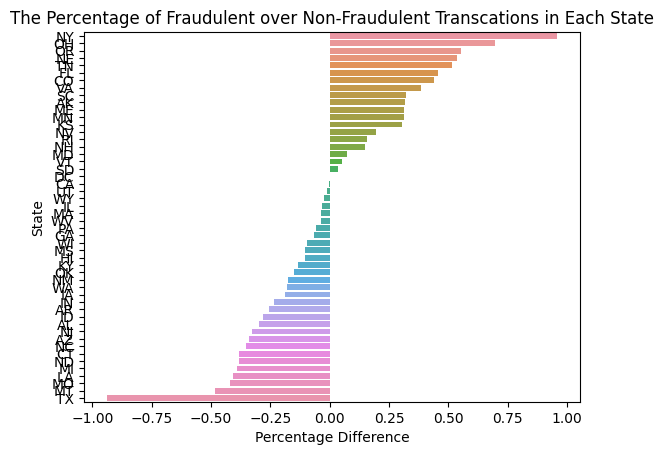

In [ ]:
a=train_data['state'][train_data.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=train_data['state'][train_data.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

As can be seen, NY and OH among others have a higher percentage of fraudulent transactions than normal ones, while TX and MT are the opposite

#Data Modeling and Prediction

Based on our EDA above, we have found out that the features including transaction amout, credit card holder age, spending category, transaction time and locations all have varying degrees of correlations with credit card fraud. This helps us choose which features we want to include in our data models. The plan is to train the models on the training data set which we have analyzed above and then use the testing dataset to evaluate the model performance.

As data models need numeric input, we need to convert some of our categorical observations into numeric ones. For transaction locations and merchant locations, we already have the longitudinal and latitudinal data. But for shopping categories, we need convert them into dummy variables using pandas.get_dummies.

In [ ]:
import datetime as dt
train_data['month']=pd.to_datetime(train_data['trans_date_trans_time']).dt.month
train_data['day']=pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
train_data['hour']=pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['age']=dt.date.today().year-pd.to_datetime(train_data['dob']).dt.year

In [ ]:
train=train_data[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(train.head())
# print(train)

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud
0,misc_net,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,1,0
1,grocery_pos,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,1,0
2,entertainment,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,1,0
3,gas_transport,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,1,0
4,misc_pos,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,1,0


In [ ]:
#subset the training data to include only the features that we need : 13 out of 23 columns
train=train_data[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [ ]:
#let's do the same to the testing dataset
# test=pd.read_csv('../input/fraud-detection/fraudTest.csv')
test_data['age']=dt.date.today().year-pd.to_datetime(test_data['dob']).dt.year
test_data['hour']=pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
test_data['day']=pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
test_data['month']=pd.to_datetime(test_data['trans_date_trans_time']).dt.month
test_data=test_data[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
normal_test_data=test_data
test_data=pd.get_dummies(test_data, drop_first=True)
y_test=test_data['is_fraud'].values
X_test=test_data.drop("is_fraud", axis='columns').values

In [ ]:
#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#balanced the Data using SMOTE:
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)


model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[524652  28922]
 [   534   1611]]
Share of Non-Fraud in Test Data: 0.9961


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.73      0.80      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.86      0.90    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[553364    210]
 [   579   1566]]
Share of Non-Fraud in Test Data: 0.9961


In [ ]:
# print('Enter these attribuutes','category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month')

# data=['misc_net',	4.97	,28654,	36.0788	,-81.1781	,3495	,36.011293	,-82.048315	,35,	0	,1]
# d=pd.get_dummies(data)
# print(d)

# method= SMOTE()
# X_resampled, y_resampled = method.fit_resample(X_train, y_train)


# model=LogisticRegression()
# model.fit(X_resampled,y_resampled)
# predicted=model.predict(d)


# print(predicted)

In [ ]:
train_fraud=train_data[train_data['is_fraud']==1][['street','lat','long','is_fraud']]
train_Not_fraud=train_data[train_data['is_fraud']==0][['street','lat','long','is_fraud']]
train_Not_fraud=train_Not_fraud[:10000]

In [ ]:
import plotly.express as px
import pandas as pd


# Create scatter map
fig = px.scatter_geo(train_fraud, lat='lat', lon='long', color='is_fraud',
                     hover_name='street', #size='mag',
                     title='Fraudulant Data')
fig.show()

In [ ]:
#Example 1742 Brandon Square found only in Non fraud datas
import plotly.express as px
import pandas as pd


# Create scatter map
fig = px.scatter_geo(train_Not_fraud, lat='lat', lon='long', color='is_fraud',
                     hover_name='street', #size='mag',
                     title='Non-Fraudulant Data')
fig.show()

In [ ]:
cat_val= train_data['category'].values
# print(cat_val)
print(np.unique(cat_val))
label_dict = {
 0:  'entertainment',
 1:  'food_dining',
 2:  'gas_transport',
 3:  'grocery_net',
 4:  'grocery_pos',
 5:  'health_fitness',
 6:  'home',
 7:  'kids_pets',
 8:  'misc_net',
 9:  'misc_pos',
 10: 'personal_care',
 11: 'shopping_net',
 12: 'shopping_pos',
 13: 'travel'
}

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import datetime as dt

train_data['month']=pd.to_datetime(train_data['trans_date_trans_time']).dt.month
train_data['day']=pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
train_data['hour']=pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['age']=dt.date.today().year-pd.to_datetime(train_data['dob']).dt.year

train=train_data[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month']]
# Define the columns for one-hot encoding and numerical scaling
categorical_columns = ['category']
numeric_columns = ['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month']

# Create a data preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply preprocessing and K-Means clustering
kmeans = KMeans(n_clusters=5)

# Combine preprocessing and clustering into one pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

# Fit the data and get cluster labels
cluster_labels = pipeline.fit_predict(train)

# The cluster_labels array will contain the cluster assignments for each data point


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels

array([0, 2, 2, ..., 3, 2, 2], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


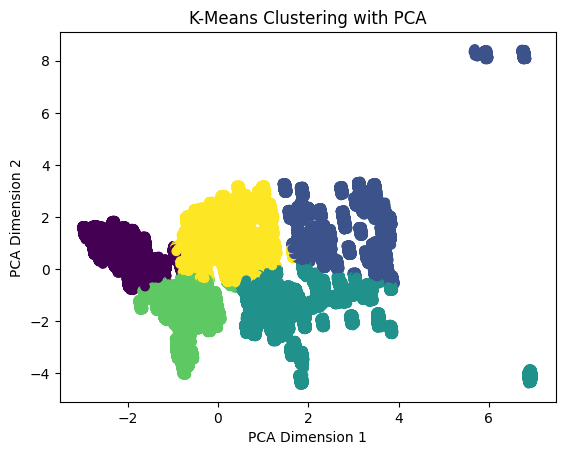

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ... Your previous code for preprocessing and clustering ...

# Apply PCA to the preprocessed data
pca = PCA(n_components=2)  # You can choose the number of components based on how many dimensions you want to reduce to
reduced_data = pca.fit_transform(preprocessor.transform(train))

# Now, 'reduced_data' contains the data reduced to 2 dimensions

# Combine preprocessing, PCA, and clustering into one pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('kmeans', kmeans)
])

# Fit the data and get cluster labels
cluster_labels = pipeline.fit_predict(train)

# The cluster_labels array will contain the cluster assignments for each data point

# Create a scatter plot for the reduced data with cluster assignments
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


In [ ]:
#clustering with Kmean

In [ ]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('/content/gdrive/MyDrive/fraudTrain.csv')
test_data=pd.read_csv('/content/gdrive/MyDrive/fraudTest.csv')

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('/content/gdrive/MyDrive/fraudTrain.csv')
test_data=pd.read_csv('/content/gdrive/MyDrive/fraudTest.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


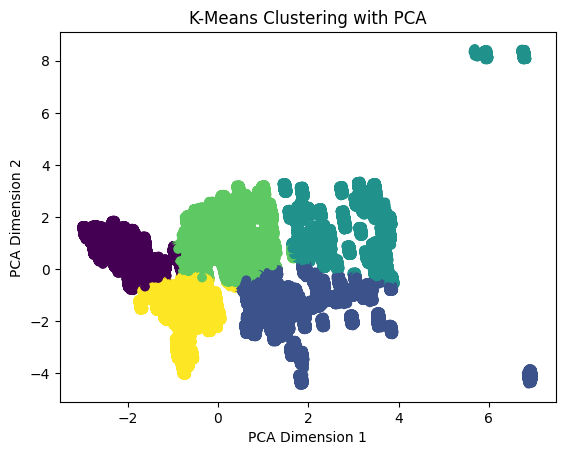

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

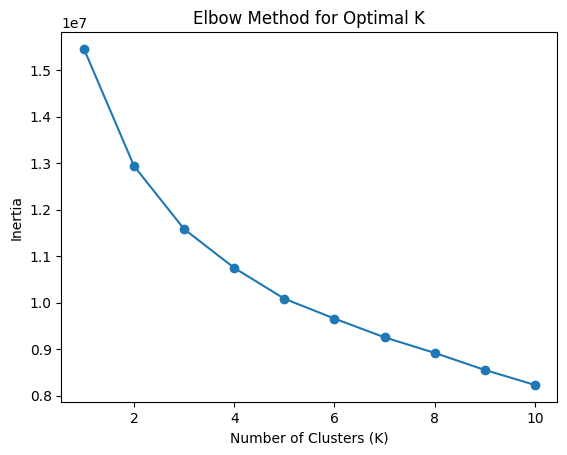

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import datetime as dt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Data preprocessing
train_data['month'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.month
train_data['day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['age'] = dt.date.today().year - pd.to_datetime(train_data['dob']).dt.year

train = train_data[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month']]

# Define the columns for one-hot encoding and numerical scaling
categorical_columns = ['category']
numeric_columns = ['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month']

# Create a data preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply preprocessing and PCA
pca = PCA(n_components=2)
kmeans = KMeans(n_clusters=5)

# Combine preprocessing, PCA, and clustering into one pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('kmeans', kmeans)
])

# Fit the data and get cluster labels
cluster_labels = pipeline.fit_predict(train)

# Apply PCA to the preprocessed data
reduced_data = pca.transform(preprocessor.transform(train))

# Create a scatter plot for the reduced data with cluster assignments
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

# Calculate the optimal number of clusters using the elbow method
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(preprocessor.transform(train))
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
#Final

In [ ]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('/content/gdrive/MyDrive/fraudTrain.csv')


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import datetime as dt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Data preprocessing
train_data['month'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.month
train_data['day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['age'] = dt.date.today().year - pd.to_datetime(train_data['dob']).dt.year

# train = train_data[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month']]
train = train_data[['category', 'amt', 'lat', 'long',  'age', 'hour', 'day', 'month']]

# Define the columns for one-hot encoding and numerical scaling
categorical_columns = ['category']
numeric_columns = ['amt',  'lat', 'long','age', 'hour', 'day', 'month']

# Create a data preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

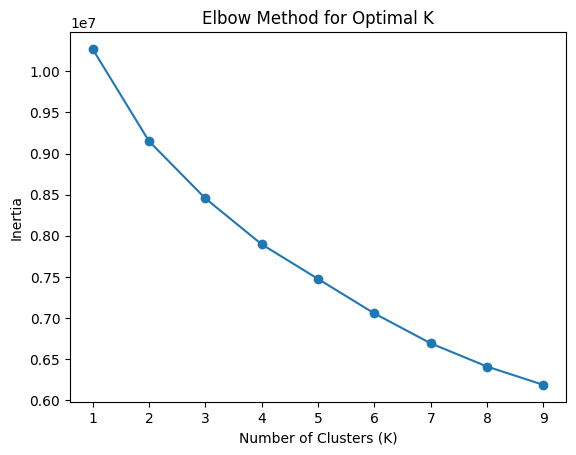

In [ ]:
# Apply preprocessing
X = preprocessor.fit_transform(train)

# Calculate the optimal number of clusters using the elbow method
distortions = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



In [ ]:
# Choose the optimal number of clusters (K) based on the elbow graph
optimal_k = 3  # Adjust this based on the graph

# Train K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)

# Get cluster assignments
cluster_labels = kmeans.labels_

# Now, you have the cluster labels for your data
print(cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 2 ... 0 2 2]


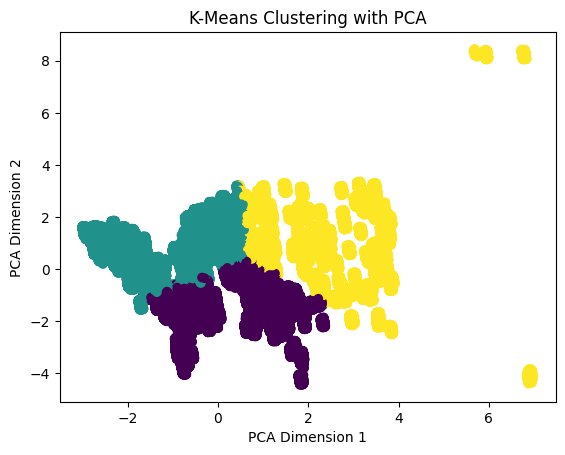

In [ ]:
pca = PCA(n_components=2)  # You can choose the number of components based on how many dimensions you want to reduce to
reduced_data = pca.fit_transform(X)

# Create a scatter plot for the reduced data with cluster assignments
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

In [ ]:
test_data=pd.read_csv('/content/gdrive/MyDrive/fraudTest.csv')

In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
test_data['month'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.month
test_data['day'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
test_data['hour'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
test_data['age'] = dt.date.today().year - pd.to_datetime(test_data['dob']).dt.year

In [ ]:
test=test_data[test_data['is_fraud']==1]
y=test['is_fraud']
test = test[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month']]
test

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month
1685,health_fitness,24.84,79759,31.8599,-102.7413,23,32.575873,-102.604290,54,22,6,6
1767,misc_net,780.52,53803,42.5545,-90.3508,1306,42.461127,-91.147148,65,22,6,6
1781,entertainment,620.33,53803,42.5545,-90.3508,1306,42.771834,-90.158365,65,22,6,6
1784,shopping_net,1077.69,70726,30.4590,-90.9027,71335,31.204974,-90.261595,29,22,6,6
1857,shopping_pos,842.65,79759,31.8599,-102.7413,23,31.315782,-102.736390,54,23,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
517197,shopping_pos,1041.51,38668,34.6323,-89.8855,14462,34.573471,-89.911011,64,22,1,12
517274,shopping_pos,868.09,38668,34.6323,-89.8855,14462,34.091227,-90.390612,64,22,1,12
517341,shopping_net,1039.42,38668,34.6323,-89.8855,14462,34.628434,-90.284780,64,22,1,12
517529,grocery_pos,289.27,38668,34.6323,-89.8855,14462,34.746063,-90.401093,64,23,1,12


In [ ]:

# Apply the same preprocessing to your sample transaction
sample_transaction_processed = preprocessor.transform(test)

# Predict the cluster label for the sample transaction
sample_cluster_label = kmeans.predict(sample_transaction_processed)

print("Sample Transaction Belongs to Cluster:", sample_cluster_label)

Sample Transaction Belongs to Cluster: [0 1 1 ... 0 0 0]


In [ ]:
for i in sample_cluster_label:
  print(i,end=" ")

0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 2 1 1 1 1 2 1 2 2 0 0 0 1 2 1 1 2 1 2 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 2 1 1 1 2 0 0 0 2 0 0 2 1 2 2 0 1 1 2 1 0 0 1 2 1 1 1 2 0 0 1 1 1 1 0 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 2 2 2 1 1 1 2 2 1 2 2 2 1 2 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 0 1 2 0 1 1 1 2 1 0 2 0 0 2 0 0 2 2 2 2 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 0 2 1 2 1 1 1 1 1 2 0 2 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 

In [ ]:
test_nonFraud=test_data[test_data['is_fraud']==0]
y=test_nonFraud['is_fraud']
test_nonFraud = test_nonFraud[['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month']]
test_nonFraud

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month
0,personal_care,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,55,12,6,6
1,personal_care,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,33,12,6,6
2,health_fitness,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,53,12,6,6
3,misc_pos,60.05,32780,28.5697,-80.8191,54767,28.812398,-80.883061,36,12,6,6
4,travel,3.19,49632,44.2529,-85.0170,1126,44.959148,-85.884734,68,12,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,43.77,63453,40.4931,-91.8912,519,39.946837,-91.333331,57,23,3,12
555715,kids_pets,111.84,77566,29.0393,-95.4401,28739,29.661049,-96.186633,24,23,3,12
555716,kids_pets,86.88,99323,46.1966,-118.9017,3684,46.658340,-119.715054,42,23,3,12
555717,travel,7.99,83643,44.6255,-116.4493,129,44.470525,-117.080888,58,23,3,12


In [ ]:
# Apply the same preprocessing to your sample transaction
sample_transaction_processed_NotFraud = preprocessor.transform(test_nonFraud)

# Predict the cluster label for the sample transaction
sample_cluster_label_NotFraud = kmeans.predict(sample_transaction_processed)

print("Sample Transaction Belongs to Cluster:", sample_cluster_label_NotFraud)


Sample Transaction Belongs to Cluster: [0 1 1 ... 0 0 0]


In [ ]:
for i in sample_cluster_label_NotFraud:
  print(i,end=" ")

0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 2 1 1 1 1 2 1 2 2 0 0 0 1 2 1 1 2 1 2 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 2 1 1 1 2 0 0 0 2 0 0 2 1 2 2 0 1 1 2 1 0 0 1 2 1 1 1 2 0 0 1 1 1 1 0 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 2 2 2 1 1 1 2 2 1 2 2 2 1 2 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 0 1 2 0 1 1 1 2 1 0 2 0 0 2 0 0 2 2 2 2 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 0 2 1 2 1 1 1 1 1 2 0 2 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 

In [ ]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('/content/gdrive/MyDrive/fraudTrain.csv')
test_data=pd.read_csv('/content/gdrive/MyDrive/fraudTest.csv')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import datetime as dt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preprocessing
train_data['month'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.month
train_data['day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['age'] = dt.date.today().year - pd.to_datetime(train_data['dob']).dt.year

# Define the features for training
features = ['category', 'amt', 'lat', 'long', 'age', 'hour', 'day', 'month']

# Define the columns for one-hot encoding and numerical scaling
categorical_columns = ['category']
numeric_columns = ['amt', 'lat', 'long', 'age', 'hour', 'day', 'month']

# Create a data preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply preprocessing and K-Means clustering in a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=0))
])

# Fit the data and get cluster labels
X = train_data[features]
cluster_labels = pipeline.fit_predict(X)

# Now, you have the cluster labels for your data
print(cluster_labels)

# Apply PCA to the preprocessed data for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(pipeline.named_steps['preprocessor'].transform(X))

# Create a scatter plot for the reduced data with cluster assignments
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel ('PCA Dimension 2')
plt.show()

# Calculate the optimal number of clusters using the elbow method (as you did before)

# Now, you have a comprehensive pipeline for data preprocessing, K-Means clustering, and PCA visualization.
